## Setup and Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
%matplotlib inline

## Load and Explore the Dataset

In [5]:
df=pd.read_csv("./data/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df=df.replace('?', np.nan)

In [11]:
print('Continous variables in the dataset are: ')
cont=[]
for i in df.columns:
  if df[i].dtype=='int64':
    cont.append(i)
    print(i,end=', ')
print('\n\nCategorical variable in the dataset are: ')
catg=[]
for i in df.columns:
  if df[i].dtype=='O':
    catg.append(i)
    print(i,end=',  ')

Continous variables in the dataset are: 
age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week, 

Categorical variable in the dataset are: 
workclass,  education,  marital.status,  occupation,  relationship,  race,  sex,  native.country,  income,  

## Univariate Analysis of Continous Variables

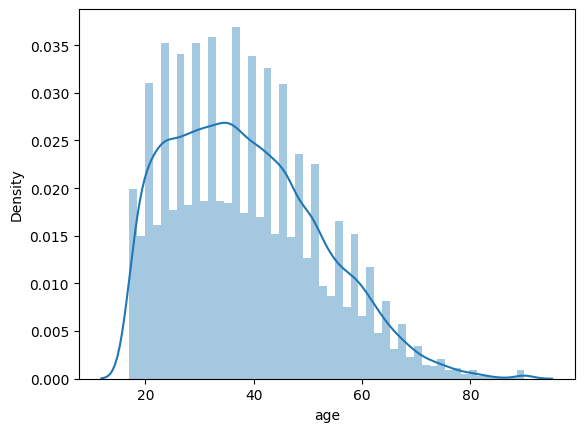

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


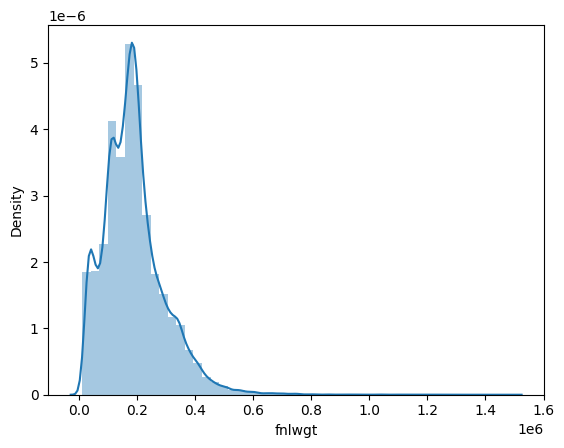

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


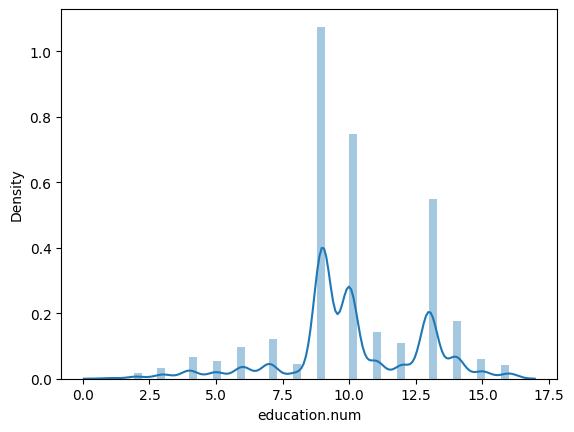

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


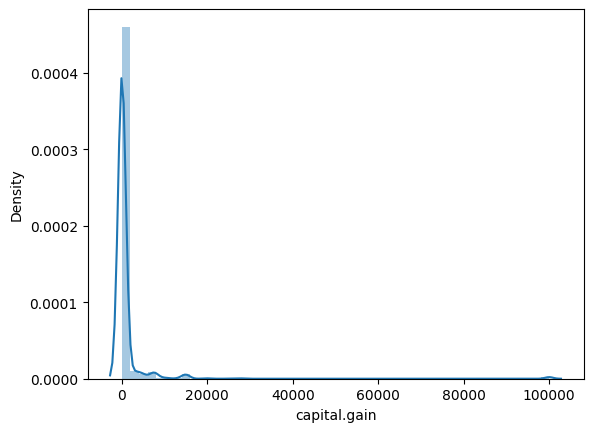

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


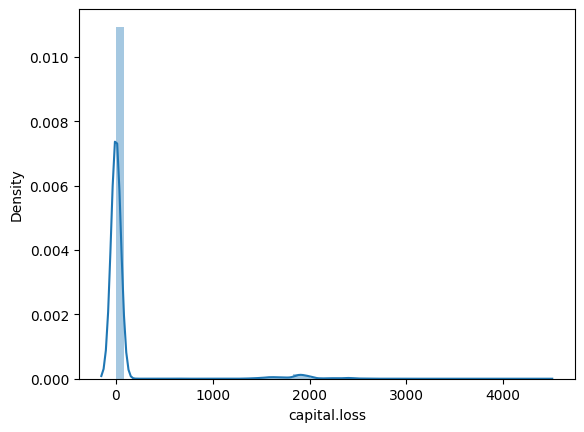

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


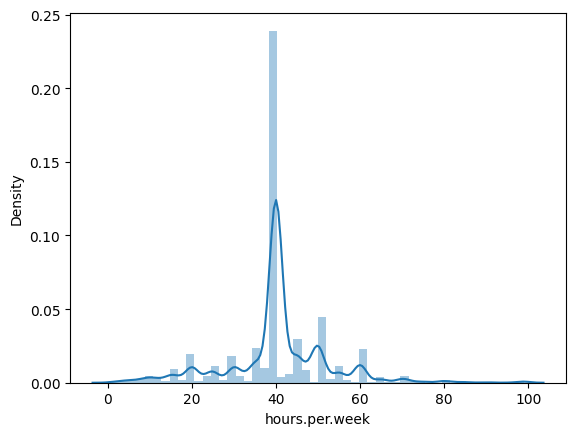

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


In [12]:
for i in cont:
  sns.distplot(df[i])
  plt.show()
  print(df[i].describe())

From the above result I can observe :

1. fnlwgt is just a census number and it is not useful for the model prediction
2. education.num is ordered-encoding of education data
3. presence of outliers in capital gain and capital loss columns

The continous variable which I am including in the final data are

1. age
2. education-num
3. capital-gain
4. capital-loss
5. hours-per-week

In [13]:
cont=['age','education-num','capital-gain','capital-loss','hours-per-week']
cont

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

## Univariate Analysis of Categorical Varaible

In [14]:
catg

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

<Axes: xlabel='workclass', ylabel='count'>

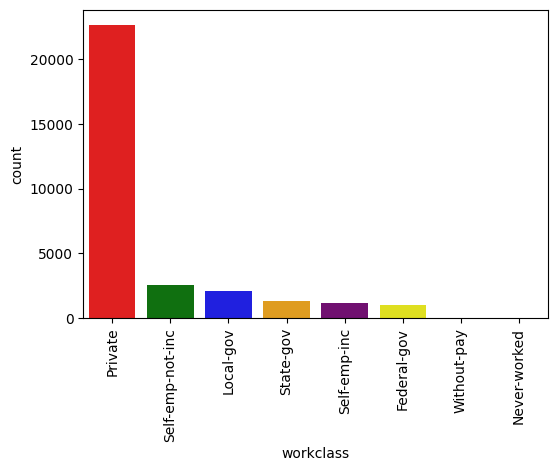

In [15]:
plt.figure(figsize=(6,4))
grp=df['workclass'].value_counts()
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'c', 'm'][:len(grp)]
plt.xticks(rotation=90)
sns.barplot(grp,palette=custom_colors)

workclass :



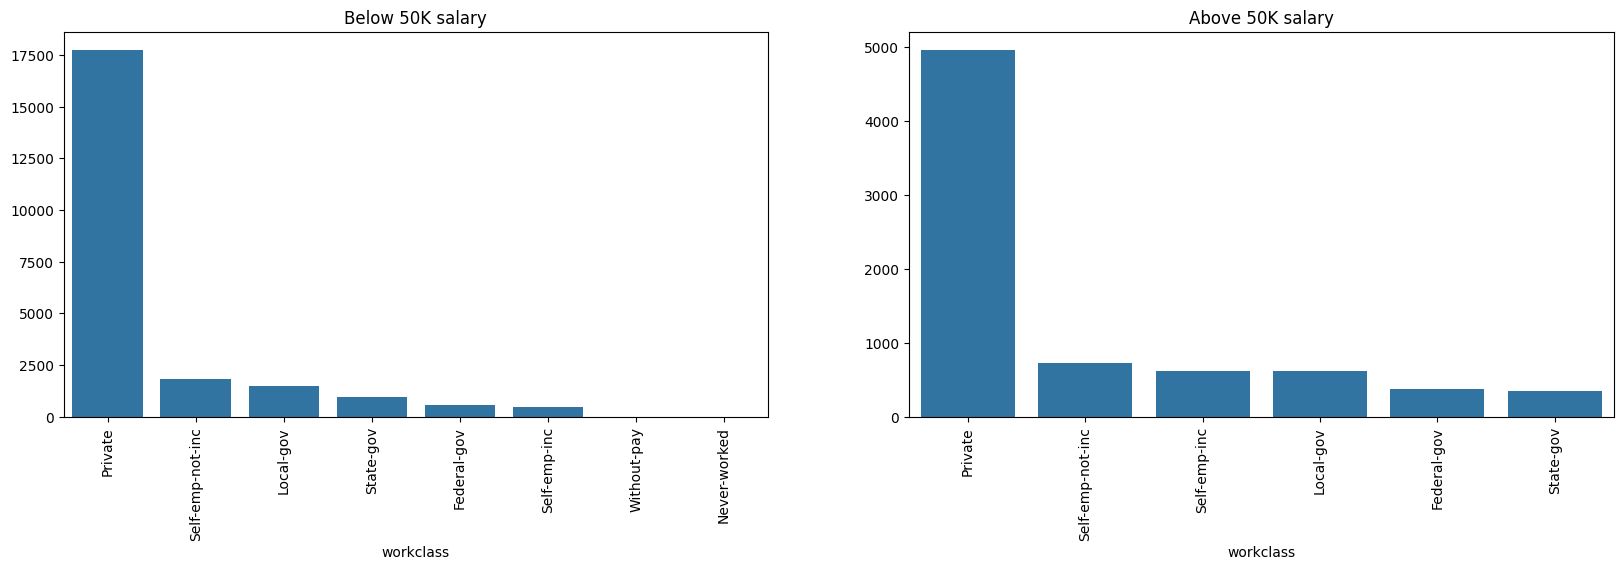

education :



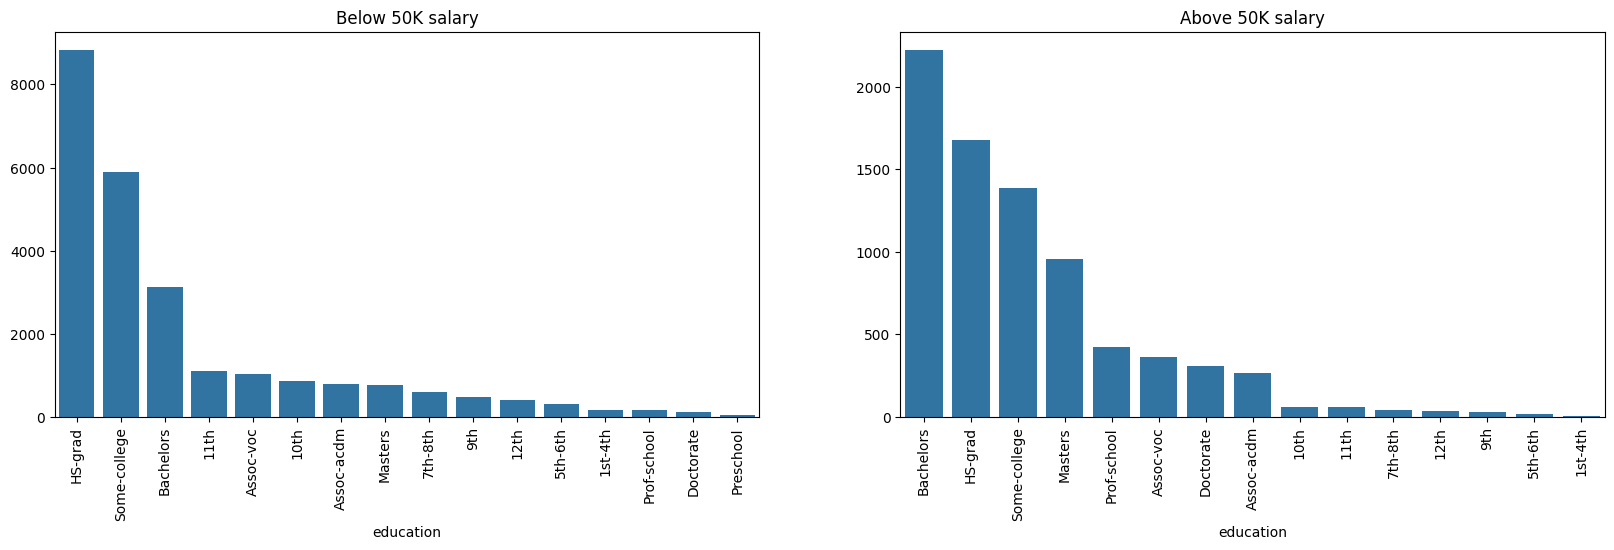

marital.status :



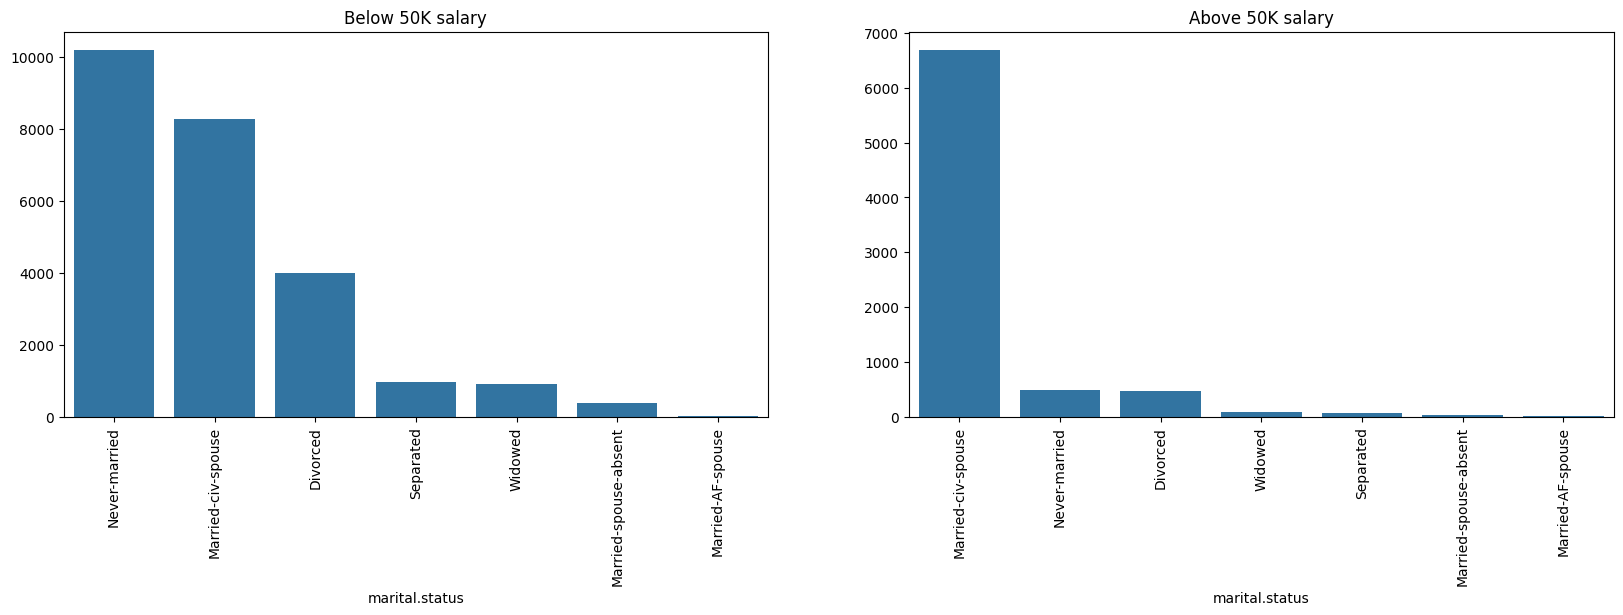

occupation :



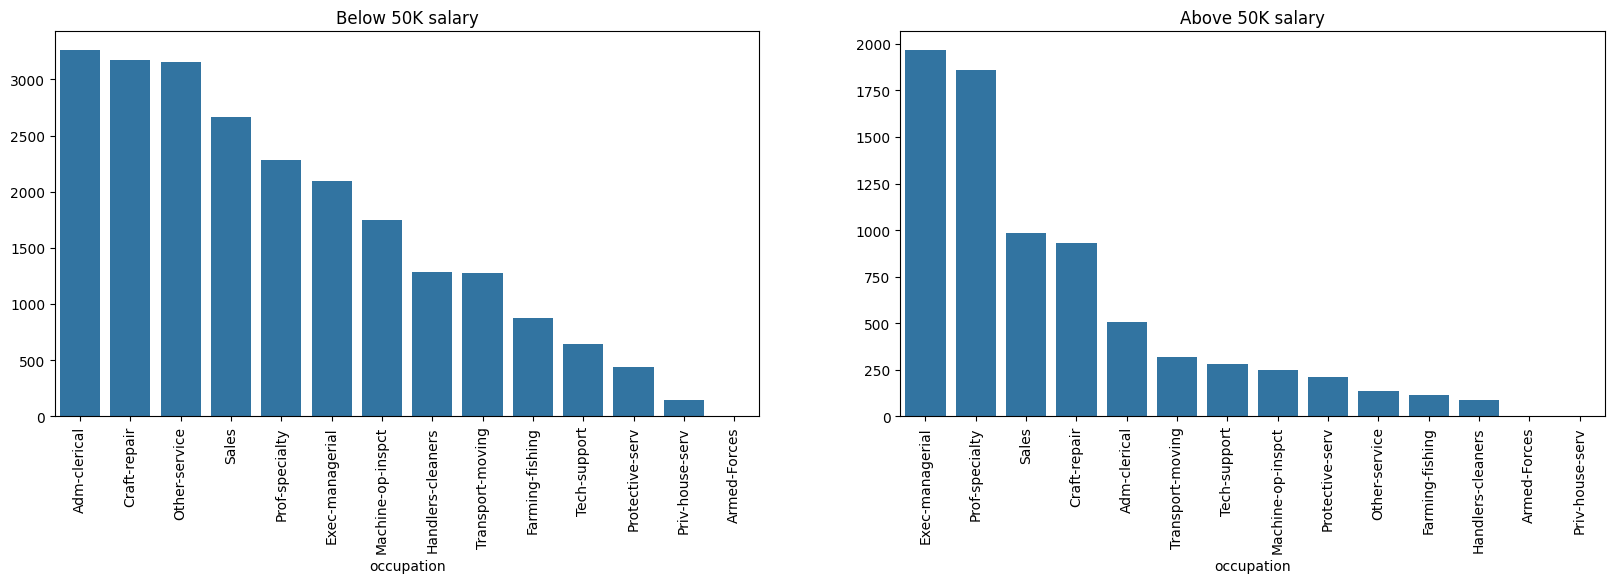

relationship :



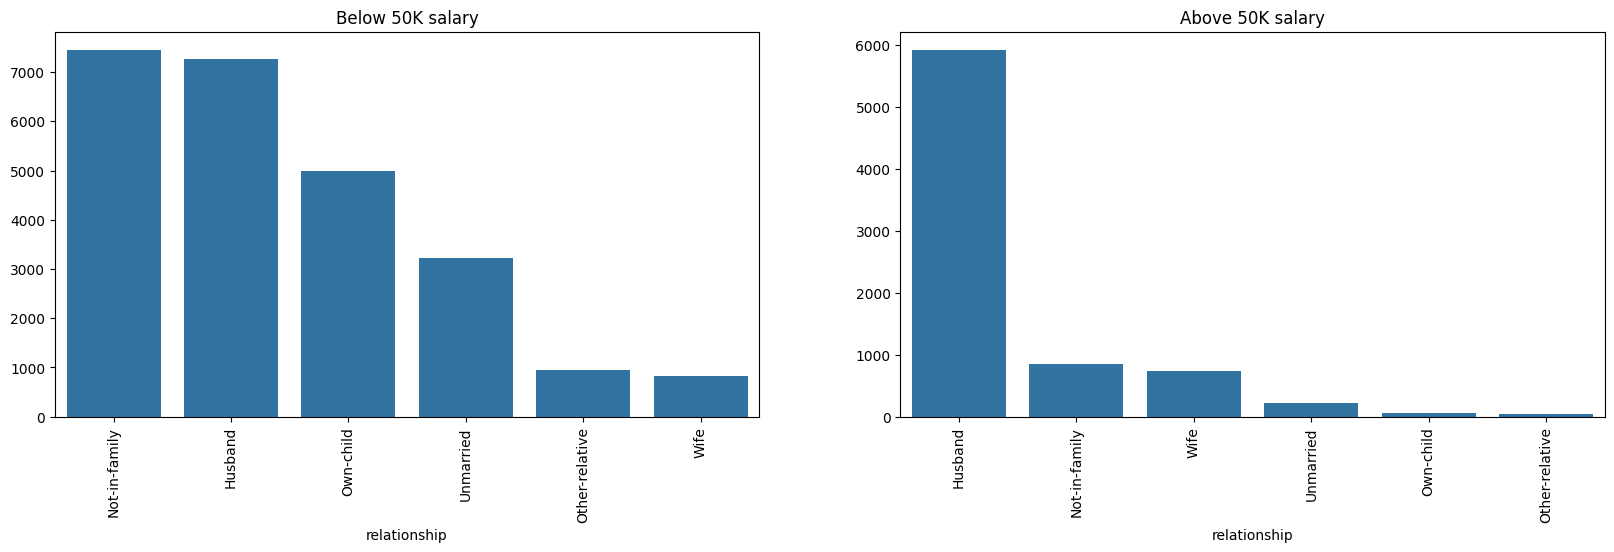

race :



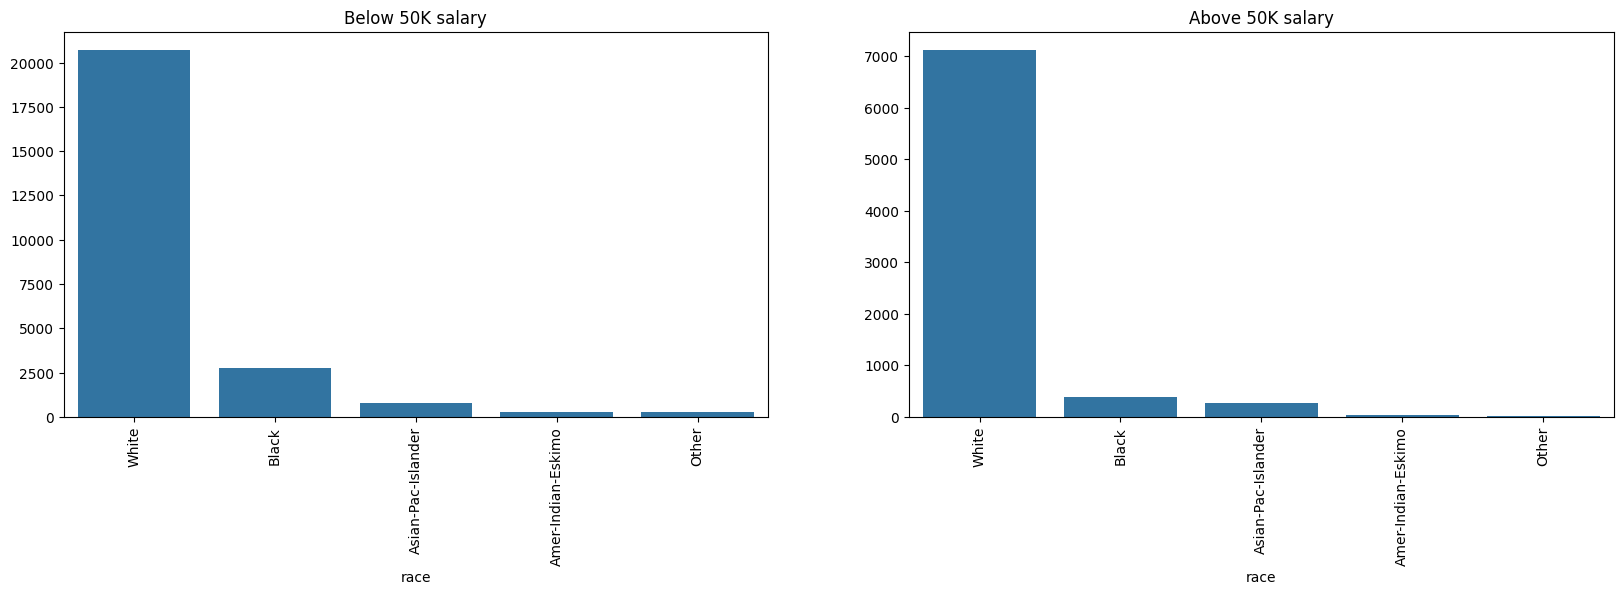

sex :



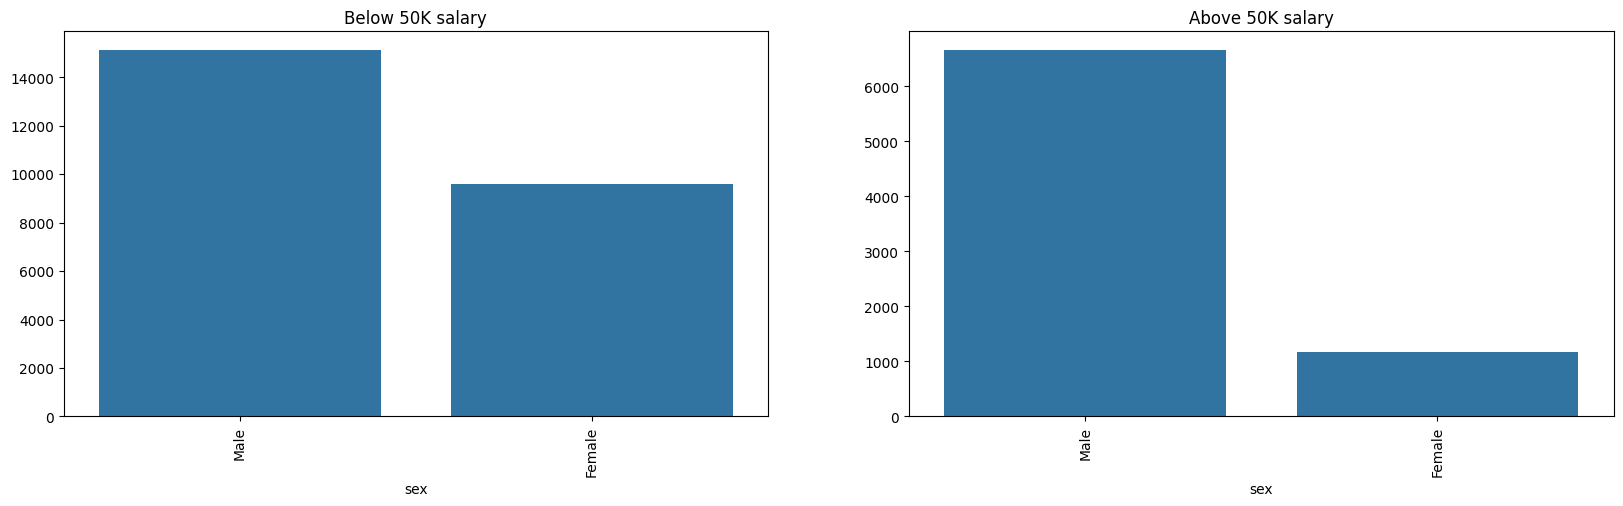

native.country :



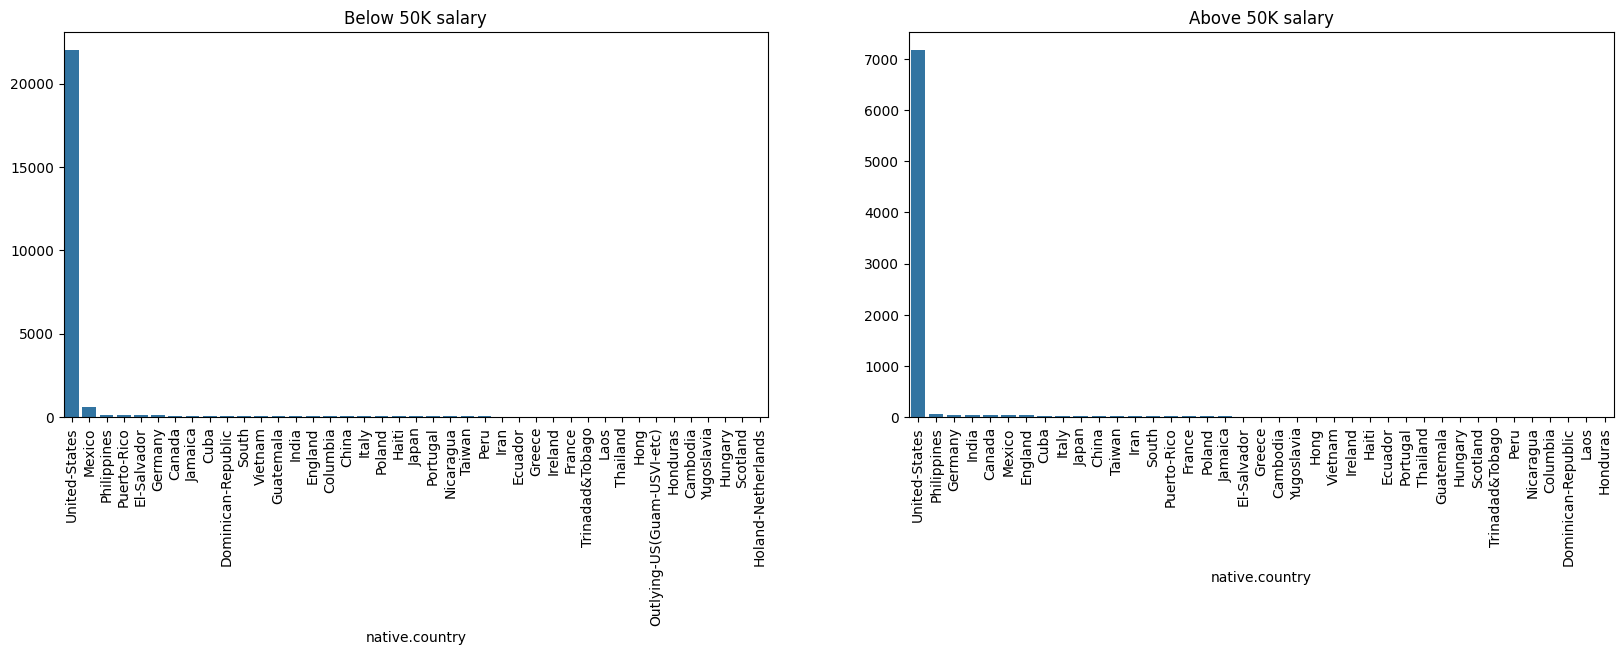

income :



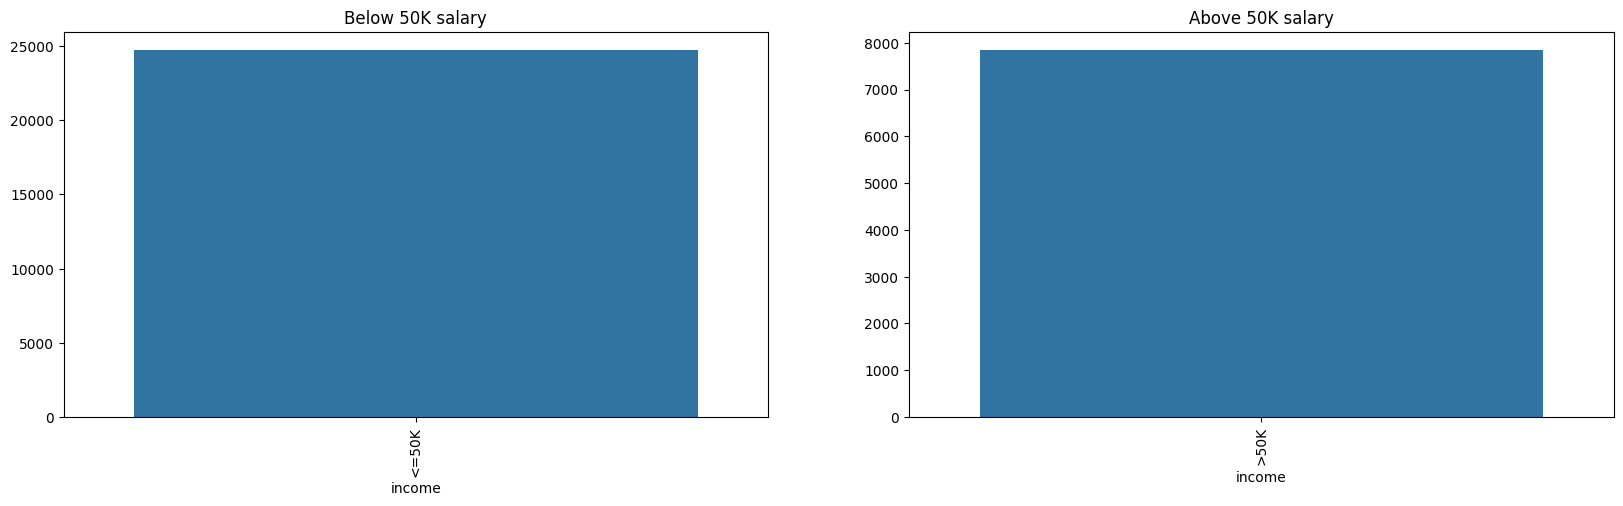

In [16]:
def catg_vis(dt,cg):
  plt.figure(figsize=(20,5))
  a=dt[dt['income']=='<=50K'][cg].value_counts() # Below 50k salary
  b=dt[dt['income']=='>50K'][cg].value_counts() # Above 50k salary
  plt.subplot(1,2,1)
  plt.title('Below 50K salary')
  plt.xticks(rotation=90)
  sns.barplot(x=a.index,y=a.values)
  plt.subplot(1,2,2)
  plt.title('Above 50K salary')
  plt.xticks(rotation=90)
  sns.barplot(x=b.index,y=b.values)
  plt.show()

for i in catg:
  print(i,':\n')
  catg_vis(df,i)

From the visualization of the categorical variables I conclude ▶

1. Drop - workclass , marital-status, relationship , country
2. Drop education as education-num (continous variable) is already present

In [17]:
catg=['occupation','race','sex']
catg

['occupation', 'race', 'sex']

## Data Preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [20]:
df=df.iloc[:,[0,2,3,4,5,7,8,9,10,11,12,14]]
df

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,HS-grad,9,Widowed,Not-in-family,White,Female,0,4356,40,<=50K
1,82,132870,HS-grad,9,Widowed,Not-in-family,White,Female,0,4356,18,<=50K
2,66,186061,Some-college,10,Widowed,Unmarried,Black,Female,0,4356,40,<=50K
3,54,140359,7th-8th,4,Divorced,Unmarried,White,Female,0,3900,40,<=50K
4,41,264663,Some-college,10,Separated,Own-child,White,Female,0,3900,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,Some-college,10,Never-married,Not-in-family,White,Male,0,0,40,<=50K
32557,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,<=50K
32558,40,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,>50K
32559,58,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,<=50K


In [21]:
df['income']=df['income'].map({'<=50K':0,'>50K':1})
df["sex"]=df["sex"].map({'Male':0,'Female':1})
df

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,HS-grad,9,Widowed,Not-in-family,White,1,0,4356,40,0
1,82,132870,HS-grad,9,Widowed,Not-in-family,White,1,0,4356,18,0
2,66,186061,Some-college,10,Widowed,Unmarried,Black,1,0,4356,40,0
3,54,140359,7th-8th,4,Divorced,Unmarried,White,1,0,3900,40,0
4,41,264663,Some-college,10,Separated,Own-child,White,1,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,Some-college,10,Never-married,Not-in-family,White,0,0,0,40,0
32557,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,1,0,0,38,0
32558,40,154374,HS-grad,9,Married-civ-spouse,Husband,White,0,0,0,40,1
32559,58,151910,HS-grad,9,Widowed,Unmarried,White,1,0,0,40,0


In [22]:
df.isnull().sum()

age               0
fnlwgt            0
education         0
education.num     0
marital.status    0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  int64 
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  income          32561 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.0+ MB


In [24]:
data=df.iloc[:,[0,1,3,7,8,9,10,11]]
data

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,1,0,4356,40,0
1,82,132870,9,1,0,4356,18,0
2,66,186061,10,1,0,4356,40,0
3,54,140359,4,1,0,3900,40,0
4,41,264663,10,1,0,3900,40,0
...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,0,40,0
32557,27,257302,12,1,0,0,38,0
32558,40,154374,9,0,0,0,40,1
32559,58,151910,9,1,0,0,40,0


In [25]:
x=data.iloc[:,:-1]
x

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week
0,90,77053,9,1,0,4356,40
1,82,132870,9,1,0,4356,18
2,66,186061,10,1,0,4356,40
3,54,140359,4,1,0,3900,40
4,41,264663,10,1,0,3900,40
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,0,40
32557,27,257302,12,1,0,0,38
32558,40,154374,9,0,0,0,40
32559,58,151910,9,1,0,0,40


In [26]:
y=data.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

## Data Correlation Heatmap

   age  fnlwgt  education.num  sex  capital.gain  capital.loss  \
0   90   77053              9    1             0          4356   
1   82  132870              9    1             0          4356   
2   66  186061             10    1             0          4356   
3   54  140359              4    1             0          3900   
4   41  264663             10    1             0          3900   

   hours.per.week  income  
0              40       0  
1              18       0  
2              40       0  
3              40       0  
4              40       0  
                age        fnlwgt  education.num           sex  capital.gain  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679      0.330795   1077.648844   
std       13.640433  1.055500e+05       2.572720      0.470506   7385.292085   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05  

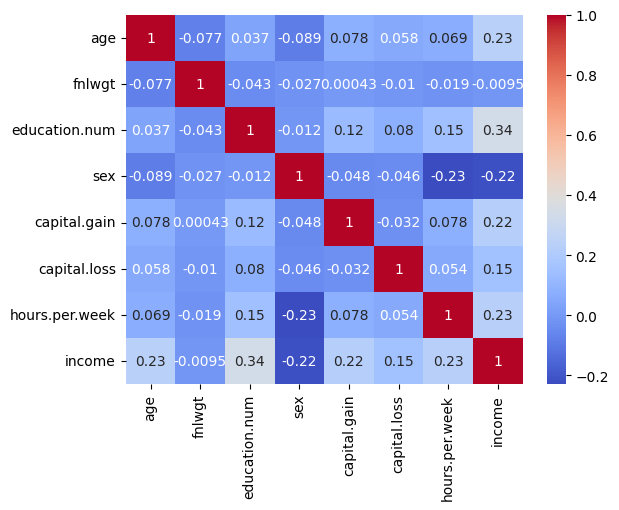

In [27]:
print(data.head())
print(data.describe())
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

## Train - Test Data Split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Selection and Training

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Prediction and Evaluation

In [30]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
accuracy_score(y_test,model.predict(x_test))

0.7982496545370796